In [80]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,f1_score,ConfusionMatrixDisplay,classification_report


In [3]:
df = pd.read_csv("week7_train.csv")

In [4]:
df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df.shape

(42000, 785)

In [6]:
df.isnull().sum()

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

In [7]:
df.iloc[0,:1]

label    1
Name: 0, dtype: int64

In [23]:
y = df.iloc[0,0]
x = df.iloc[0,1:]


In [9]:

y

1

In [10]:
x

pixel0      0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Name: 0, Length: 784, dtype: int64

1


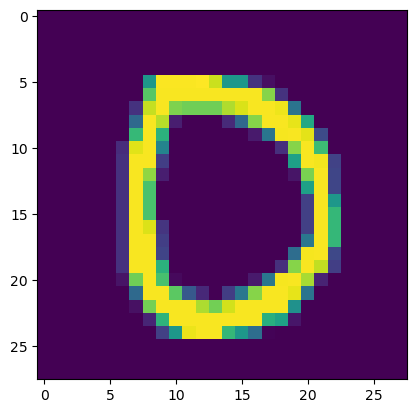

In [24]:
plt.imshow(df.iloc[260,1:].values.reshape(28,28))
print(df.iloc[0,0])

In [27]:
df.iloc[0:4000,0]

0       1
1       0
2       1
3       4
4       0
       ..
3995    6
3996    7
3997    6
3998    6
3999    4
Name: label, Length: 4000, dtype: int64

In [31]:
df.iloc[0,1:]

pixel0      0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Name: 0, Length: 784, dtype: int64

In [36]:
x = df.iloc[0:4000,1:]
y = df.iloc[0:4000,0]

In [46]:
classifier = KNeighborsClassifier()  

In [53]:
mf = df.sample(frac=0.10)
y = mf.iloc[:, 0]
x = mf.iloc[:, 1:]

In [55]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state = 42)

In [60]:
classifier = KNeighborsClassifier(n_neighbors=5,metric = 'euclidean')
classifier.fit(X_train,y_train)

KNeighborsClassifier(metric='euclidean')

In [62]:
y_pred = classifier.predict(X_test)
y_pred

array([1, 5, 2, 3, 3, 3, 7, 1, 4, 2, 2, 7, 0, 3, 0, 4, 4, 8, 9, 6, 2, 3,
       5, 7, 3, 9, 6, 6, 1, 5, 4, 5, 2, 6, 7, 6, 6, 6, 2, 5, 8, 8, 9, 8,
       2, 2, 9, 6, 6, 4, 5, 6, 6, 7, 4, 0, 8, 2, 0, 0, 6, 8, 7, 6, 9, 9,
       8, 4, 8, 9, 5, 0, 4, 7, 7, 7, 8, 6, 1, 3, 8, 3, 3, 6, 9, 0, 9, 9,
       9, 6, 8, 2, 9, 3, 6, 0, 7, 5, 6, 8, 6, 8, 1, 5, 7, 2, 0, 0, 7, 4,
       7, 3, 5, 8, 8, 7, 3, 7, 8, 3, 1, 5, 8, 2, 6, 7, 1, 5, 3, 5, 2, 9,
       3, 3, 2, 3, 7, 5, 8, 1, 8, 1, 0, 6, 7, 9, 6, 5, 3, 5, 1, 3, 3, 1,
       7, 4, 6, 8, 9, 8, 6, 0, 9, 0, 9, 9, 1, 2, 3, 1, 7, 9, 6, 7, 1, 0,
       8, 1, 8, 0, 5, 5, 4, 0, 3, 9, 9, 9, 5, 5, 4, 0, 0, 5, 2, 1, 3, 2,
       3, 0, 6, 5, 6, 5, 0, 1, 0, 4, 5, 6, 6, 1, 7, 0, 9, 5, 0, 8, 7, 0,
       4, 7, 6, 1, 0, 7, 4, 6, 0, 1, 5, 2, 7, 4, 3, 6, 6, 8, 8, 0, 6, 9,
       7, 7, 0, 4, 3, 8, 8, 9, 2, 1, 4, 5, 0, 4, 4, 9, 6, 8, 8, 2, 7, 8,
       1, 7, 0, 6, 3, 7, 2, 7, 7, 8, 1, 9, 4, 3, 9, 3, 7, 7, 2, 7, 4, 4,
       0, 0, 6, 8, 8, 0, 8, 3, 3, 7, 7, 9, 2, 1, 6,

In [68]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[ 81,   0,   0,   0,   0,   0,   3,   0,   0,   1],
       [  0,  79,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   6,  67,   1,   1,   0,   1,   1,   1,   0],
       [  0,   0,   0,  79,   0,   3,   0,   0,   3,   0],
       [  0,   1,   0,   0,  62,   0,   1,   0,   0,   4],
       [  0,   1,   0,   2,   1,  66,   2,   0,   0,   1],
       [  0,   0,   0,   0,   0,   0,  77,   0,   0,   0],
       [  0,   0,   0,   0,   3,   0,   0, 100,   0,   4],
       [  0,   4,   1,   2,   0,   2,   1,   1,  84,   0],
       [  1,   0,   0,   1,   2,   0,   0,   3,   0,  86]])

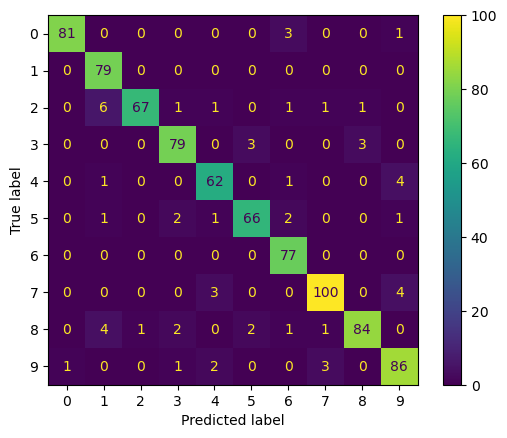

In [76]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [79]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97        85
           1       0.87      1.00      0.93        79
           2       0.99      0.86      0.92        78
           3       0.93      0.93      0.93        85
           4       0.90      0.91      0.91        68
           5       0.93      0.90      0.92        73
           6       0.91      1.00      0.95        77
           7       0.95      0.93      0.94       107
           8       0.95      0.88      0.92        95
           9       0.90      0.92      0.91        93

    accuracy                           0.93       840
   macro avg       0.93      0.93      0.93       840
weighted avg       0.93      0.93      0.93       840

